<a href="https://colab.research.google.com/github/ThomalaSahithi/OIBSIP/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IRIS FLOWER CLASSIFICATION

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

LOADING THE DATASET

In [2]:
# loading the dataset
df = pd.read_csv('Iris.csv')
#printing first 6 rows
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


INFORMATION AND STATISTICS OF THE DATASET

In [3]:
#basic information about dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [4]:
# summary statistics
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


SOME VISUALIZATIONS TO UNDERSTAND THE DATA CLEARLY

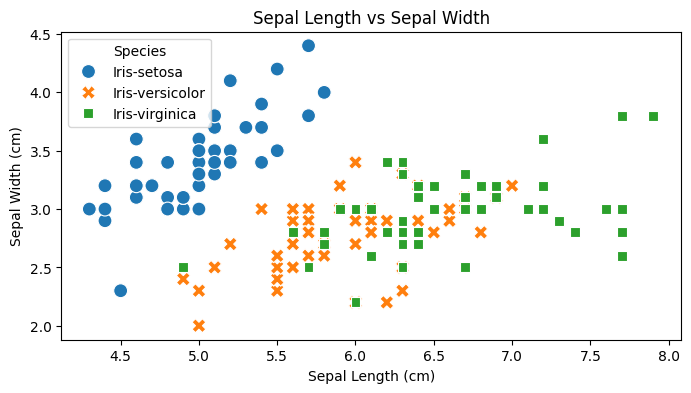

In [5]:
# relationship between sepallength and sepalwidth
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', style='Species', s=100)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

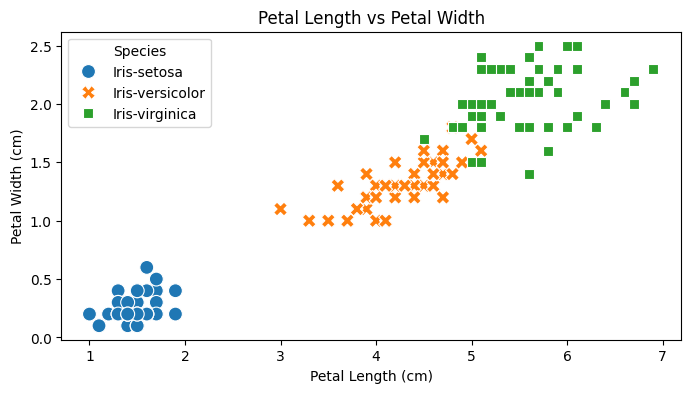

In [6]:
# relationship between petallength and petalwidth
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', style='Species', s=100)
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

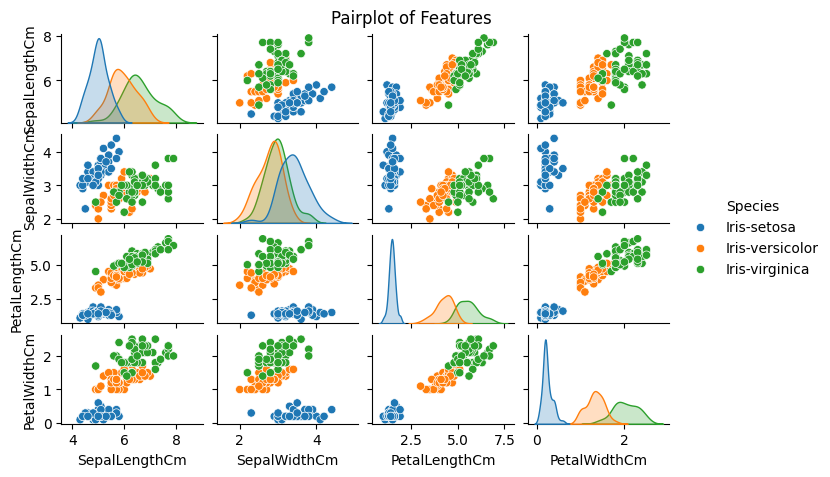

In [7]:
# pairplot
sns.pairplot(df.drop('Id', axis=1), hue='Species', height=1.15, aspect=1.5)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

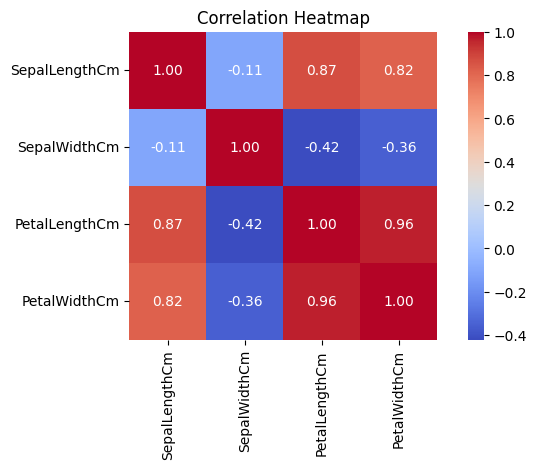

In [8]:
# Coorelation heatmap
plt.figure(figsize=(8, 4))
correlation_matrix = df.drop(['Id', 'Species'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

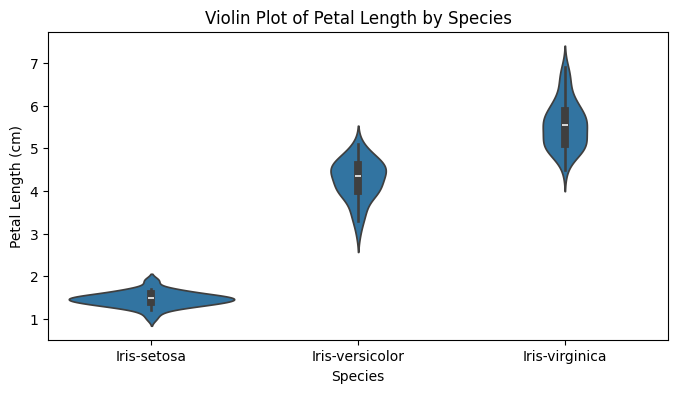

In [9]:
# violin plot of petallength
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x='Species', y='PetalLengthCm')
plt.title('Violin Plot of Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

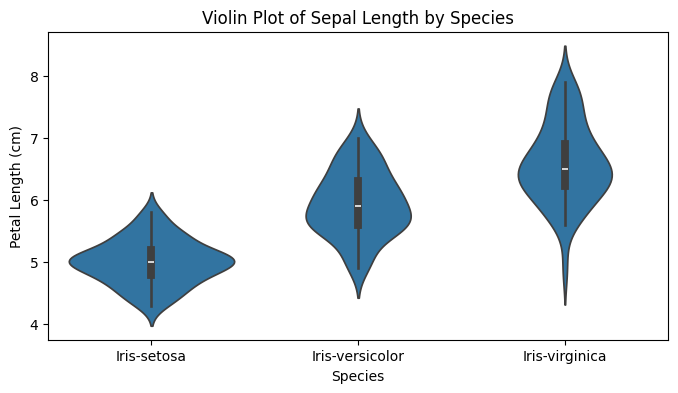

In [10]:
# violin plot of sepallength
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x='Species', y='SepalLengthCm')
plt.title('Violin Plot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

CLEANING THE DATASET

In [11]:
#checking missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

Missing values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Duplicate rows: 0


PREPARING THE DATASET

In [12]:
# Features (X) and Target (y)
X = df.drop(columns='Species')
y = df['Species']

SPLITTING THE DATASET

In [13]:
#splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# scaling the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MODEL1 : LOGISTIC REGRESSION

In [15]:
# logistic regression
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Making predictions
y_pred_LR = model_LR.predict(X_test)

# Calculate accuracy, confusion matrix, and classification report
accuracy_LR = accuracy_score(y_test, y_pred_LR)
conf_matrix_LR = confusion_matrix(y_test, y_pred_LR)
class_report_LR = classification_report(y_test, y_pred_LR)

In [17]:
# Printing the results
print("Accuracy:", accuracy_LR)
print("Accuracy in percentage: {:.2f}%".format(accuracy_LR * 100))
print("Confusion matrix:\n", conf_matrix_LR)
print("Classification Report:\n", class_report_LR)

Accuracy: 1.0
Accuracy in percentage: 100.00%
Confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



MODEL2 : SUPPORT VECTOR CLASSIFIER(SVC)

In [18]:
#SVC
from sklearn.svm import SVC

model_SVC = SVC()
model_SVC.fit(X_train, y_train)

SVC()

In [19]:
# Making predictions
y_pred_SVC = model_SVC.predict(X_test)

# Calculate accuracy, confusion matrix, and classification report
accuracy_SVC = accuracy_score(y_test, y_pred_SVC)
conf_matrix_SVC = confusion_matrix(y_test, y_pred_SVC)
class_report_SVC = classification_report(y_test, y_pred_SVC)

In [20]:
# Printing the results
print("Accuracy:", accuracy_SVC)
print("Accuracy in percentage: {:.2f}%".format(accuracy_SVC * 100))
print("Confusion matrix:\n", conf_matrix_SVC)
print("Classification Report:\n", class_report_SVC)

Accuracy: 1.0
Accuracy in percentage: 100.00%
Confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



MODEL3 :DECISION TREE CLASSIFIER

In [21]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
# Making predictions
y_pred_DT = model_DT.predict(X_test)

# Calculate accuracy, confusion matrix, and classification report
accuracy_DT = accuracy_score(y_test, y_pred_DT)
conf_matrix_DT = confusion_matrix(y_test, y_pred_DT)
class_report_DT = classification_report(y_test, y_pred_DT)

In [23]:
# Printing the results
print("Accuracy:", accuracy_DT)
print("Accuracy in percentage: {:.2f}%".format(accuracy_DT * 100))
print("Confusion matrix:\n", conf_matrix_DT)
print("Classification Report:\n", class_report_DT)

Accuracy: 1.0
Accuracy in percentage: 100.00%
Confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



PREDICTION OF THE SPECIES FROM THE INPUT VECTOR

In [24]:
# new data for prediction
X_new = np.array([[5.1, 3.5, 1.4, 0.2], [4.9, 2.3, 3.8, 1.1], [6.7, 3.0, 5.2, 2.0]])

# Add a dummy feature (e.g., 0) to X_new to match the expected number of features
X_new_with_dummy = np.c_[X_new, np.zeros(X_new.shape[0])]

X_new_scaled = scaler.transform(X_new_with_dummy)

# Prediction with logistic regression
prediction_LR = model_LR.predict(X_new_scaled)
print("Prediction of Species_LR: {}\n".format(prediction_LR))

# Prediction with logistic regression
prediction_SVC = model_SVC.predict(X_new_scaled)
print("Prediction of Species_SVC: {}\n".format(prediction_SVC))

# Prediction with logistic regression
prediction_DT = model_DT.predict(X_new_scaled)
print("Prediction of Species_DT: {}\n".format(prediction_DT))

Prediction of Species_LR: ['Iris-setosa' 'Iris-setosa' 'Iris-setosa']

Prediction of Species_SVC: ['Iris-setosa' 'Iris-setosa' 'Iris-virginica']

Prediction of Species_DT: ['Iris-setosa' 'Iris-setosa' 'Iris-setosa']



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
